**Improving_Recognition_Accuracy_Using_Convolutions**

In [30]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

In [31]:
#Load the fashion MNIST dataset
fmnist = tf.keras.datasets.fashion_mnist

In [32]:
#Load the training and test split of the Fashion MNIST dataset
(training_images, training_labels),(testing_images, testing_labels) = fmnist.load_data()

In [33]:
#Normalize the pixel values of the train and test image
training_images= training_images/255.0
testing_images= testing_images/255.0

In [34]:
#Add Convolution and map pooling layers
# 64 -> Filter , (3,3) filter shape, (28,28) -> pixel 
# 1 -> for the color depth which is greyscale in MNIST  
L0 = tf.keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=(28, 28, 1))
L1 = tf.keras.layers.MaxPool2D (2,2) 
#take the maximum pixel value of the (2,2) which is 4 pixels
L2 = tf.keras.layers.Conv2D(64, (3,3), activation='relu')
L3 = tf.keras.layers.MaxPool2D (2,2) 

In [35]:
#Add the same layers of model as before
L4 = tf.keras.layers.Flatten()
L5 = tf.keras.layers.Dense(128, activation='relu') #detect the rule between L0 and L2
L6 = tf.keras.layers.Dense(10, activation='softmax') #shape of classes

In [36]:
#Building the Classification model
model = tf.keras.models.Sequential([L0,L1,L2,L3,L4,L5,L6])

In [37]:
classifications = model.predict(testing_images)
print(classifications[0])
print(testing_labels[0])

[0.10009117 0.10163258 0.10912745 0.09514107 0.09948713 0.09867156
 0.09224025 0.10630224 0.09358066 0.10372584]
9


In [38]:
#Print the model summary using .summary fn().
#1600 -> 5 * 5 * 64 
#Missed 2 pixels from the pixel in the corner which has no left of upper neighbours.
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 26, 26, 64)        640       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 13, 13, 64)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 11, 11, 64)        36928     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 flatten_5 (Flatten)         (None, 1600)              0         
                                                                 
 dense_10 (Dense)            (None, 128)              

In [39]:
#Compile the model
model.compile(loss='sparse_categorical_crossentropy',
              optimizer='Adam',
              metrics=['accuracy'])

In [40]:
#Using callbacks to stop training when it reaches a specific value for some metric
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    #Check the accuracy
    if(logs.get('accuracy') >= 0.90): # Experiment with changing this value
      #Stop if Threshold is met
      print("\nReached 90% accuracy so cancelling training!")
      self.model.stop_training = True

In [41]:
#Instantiate callback class & Train the model
callbacks = myCallback()
history = model.fit(training_images, training_labels, epochs=50, callbacks=[callbacks])

Epoch 1/50
1875/1875 [==============================] - 107s 57ms/step - loss: 0.4466 - accuracy: 0.8373
Epoch 2/50
1875/1875 [==============================] - 106s 57ms/step - loss: 0.2985 - accuracy: 0.8907
Epoch 3/50
1875/1875 [==============================] - ETA: 0s - loss: 0.2500 - accuracy: 0.9084
Reached 90% accuracy so cancelling training!
1875/1875 [==============================] - 106s 57ms/step - loss: 0.2500 - accuracy: 0.9084


In [42]:
#Model History Keys
history.history.keys()

dict_keys(['loss', 'accuracy'])

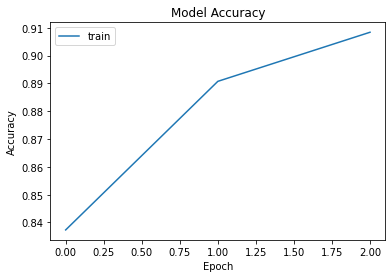

In [43]:
#Plot Accuracy Curve 
plt.plot(history.history['accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['train'], loc='upper left')
plt.show()

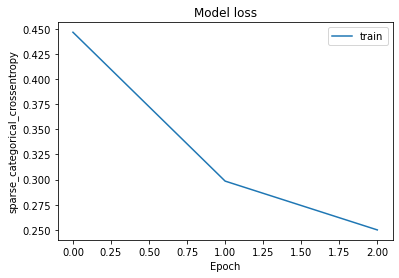

In [44]:
#Plot Loss Curve 
plt.plot(history.history['loss'])
plt.title('Model loss')
plt.xlabel('Epoch')
plt.ylabel('sparse_categorical_crossentropy')
plt.legend(['train'], loc='upper right')
plt.show()

In [45]:
#Evaluate the model on unseen data
model.evaluate(testing_images, testing_labels)

313/313 [==============================] - 5s 15ms/step - loss: 0.2822 - accuracy: 0.8979


[0.28220951557159424, 0.8978999853134155]

**Visualizing the Convolutions and Pooling**

In [46]:
#Print the testing labels
print(testing_labels[:100])

[9 2 1 1 6 1 4 6 5 7 4 5 7 3 4 1 2 4 8 0 2 5 7 9 1 4 6 0 9 3 8 8 3 3 8 0 7
 5 7 9 6 1 3 7 6 7 2 1 2 2 4 4 5 8 2 2 8 4 8 0 7 7 8 5 1 1 2 3 9 8 7 0 2 6
 2 3 1 2 8 4 1 8 5 9 5 0 3 2 0 6 5 3 6 7 1 8 0 1 4 2]


In [47]:
#import models from tf.keras
from tensorflow.keras import models

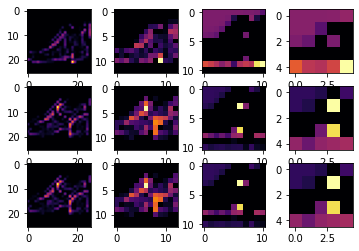

In [56]:
#Visualizing the Convolutions and Pooling

f, axarr = plt.subplots(3,4)

FIRST_IMAGE = 0
SECOND_IMAGE = 23
THIRD_IMAGE = 28
CONVOLUTION_NUMBER = 1

layer_outputs = [layer.output for layer in model.layers]
activation_model = tf.keras.models.Model(inputs = model.input, outputs = layer_outputs)

for x in range(0,4):
  f1 = activation_model.predict(testing_images[FIRST_IMAGE].reshape(1, 28, 28, 1))[x]
  axarr[0,x].imshow(f1[0, :, :, CONVOLUTION_NUMBER], cmap='inferno')
  axarr[0,x].grid(False)

  f2 = activation_model.predict(testing_images[SECOND_IMAGE].reshape(1, 28, 28, 1))[x]
  axarr[1,x].imshow(f2[0, :, :, CONVOLUTION_NUMBER], cmap='inferno')
  axarr[1,x].grid(False)

  f3 = activation_model.predict(testing_images[SECOND_IMAGE].reshape(1, 28, 28, 1))[x]
  axarr[2,x].imshow(f3[0, :, :, CONVOLUTION_NUMBER], cmap='inferno')
  axarr[2,x].grid(False)